# OUTLIER & NOVELTY DETECTION
---
Materials prepared, or collected and modified by:    
__Pawel Rosikiewicz__, www.SimpleAI.ch   


## CONTENT
* My Cheatshits on logistic regression

* Code examples

In [2]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # basic functions for plots
import numpy as np # support for multi-dimensional arrays
import pandas as pd # dataframes in python
import random # random number generators
import glob # list names in folders that match Unix shell patterns
import re # regular expressions, 
import os # directory operations,  
import seaborn as sns # advanced plots for statistics,
import scipy.stats as stats # statistics and technical programming, 
%matplotlib inline

## Plot sigmoid function 
a function used to transform lod(odds) into probabilities

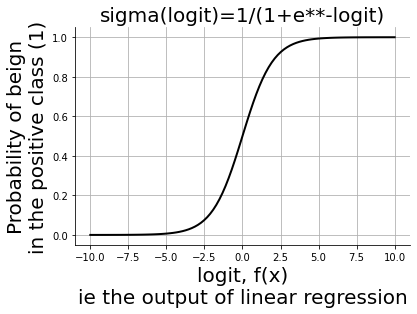

In [4]:
# Logistig regression - example - how the probability is calulated for probits, 
x = np.linspace(-10,10,100)
y = 1/(1+np.e**(-x))
plt.plot(x,y, color="black", lw=2)
plt.grid()
plt.title("sigma(logit)=1/(1+e**-logit)", fontsize=20)
plt.ylabel("Probability of beign\nin the positive class (1)", fontsize=20)
plt.xlabel("logit, f(x)\nie the output of linear regression", fontsize=20)
sns.despine()

## Binary classyfication with Logistic Regression
---

### Create Example Data

The goal of this example, is present how does the system works, on an easy example.
Thereofre, we will create example dataset wiht 1000 data points, using sklearn make_classification. It will have 2 numeric features, and two classes 0/1 in target variable.
for more complicated examples of binary classyfication, you may see:
* __Titanic datasets exploration at kaggle__, https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook 
* __PriceHook__, my project, notebook 2, and 3 where I used logistic regression for classyficaiton of apartments https://github.com/PawelRosikiewicz/PriceHook  


In [156]:
from sklearn.datasets import make_classification # creates simple data egxample

# create the data with 1000 samples, 2 features, and 2 class labels in target variable
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5, # The number of informative features
    n_redundant=0, # random linear combinations of the informative features.
    n_repeated=0, # duplicated features, either informative or redundant
    n_clusters_per_class=1, # nr. of "blobs" per class, ≤feature_nr/class
    n_classes=2
)

# chek the data
print("data: ", X.shape)
print("labels: ", y.shape)

# see the data
pd.Series(y).value_counts()
pd.DataFrame(X).head()

data:  (1000, 10)
labels:  (1000,)


,0,1,2,3,4,5,6,7,8,9
0,-0.203140,0.883199,0.199810,1.685611,0.809745,1.115892,1.506118,-1.512136,-0.258678,-1.371569
1,-1.094820,0.105975,0.009979,0.759698,-0.396923,0.849462,-1.479808,0.315054,0.257959,-0.860246
2,-0.066186,-1.052929,-0.355710,0.673650,-0.060224,-0.496424,-0.602745,-1.258335,-1.173125,-0.147911
3,-0.696235,-0.167427,-0.768610,-1.087575,1.835003,0.359866,-1.927095,-1.102992,-0.813034,-1.583627
4,-5.086283,-0.382089,-3.724894,2.061923,-0.651255,-1.306775,-1.096385,2.617994,1.651933,1.097915


prepare data frame wiht all data, for easy access and column names 

In [197]:
# prepare data frame with X data
colnames = [f"feature{x}" for x in np.arange(X.shape[1]).tolist()]
colnames.append("target_variable")

data_df = pd.concat([pd.DataFrame(X),pd.Series(y)], axis=1)
data_df.columns=colnames

create summary for all variables with my EDA helper functions
* how many data points have missing data?
* do you see any features wiht unbalanced class composition?
* target variable
    * how many classes are there?
    * are these classes balanced?

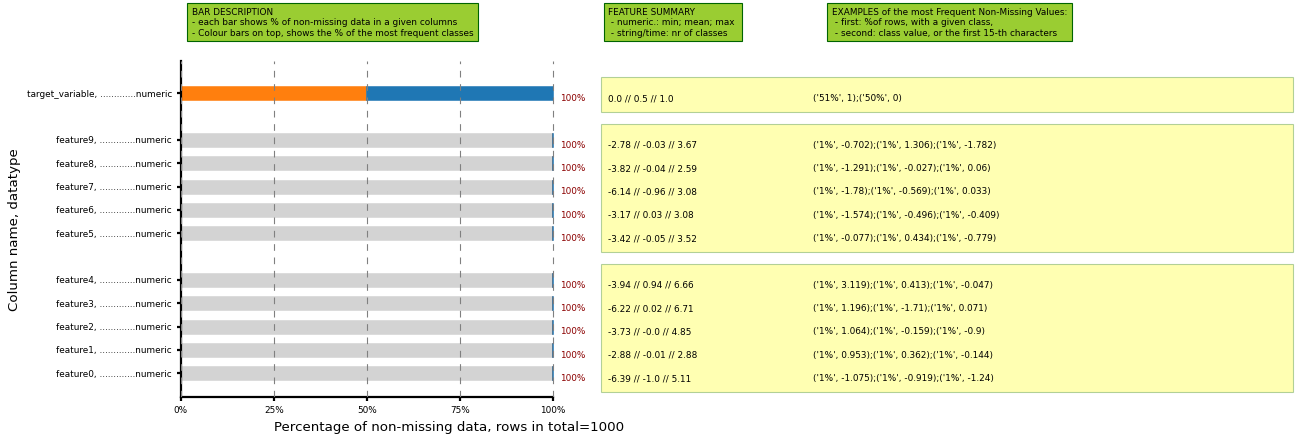

In [199]:
from src.utils.DataFrameExplorer_summary import df_summary_plot

# plot data frame summary with dfe package
df_summary_plot(
    df                  = data_df,
    barPlot_figsize     = (18,6),
    groups_to_display   = ['text','numeric','datetime'], # to have separate barplot for each dtype
    showTable  = False,
    pieChart = False
) 

check if features used for class prediction are normally distributed

You may use scatter plot to chek if the groups are linearly separable. For that, I prepared a helper function, that you may find in scr.utils

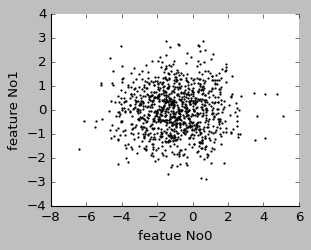

In [206]:
def scatter2D(X, y, features=(0,1)):
    ''' plots first two features in numpy array, with scatterplot
        labels are shown as differernt colors
        . X - np.array, numeric dtype, 
        . y - vetor with labels,  
        . features = tuple, selected feaures to plot, integers, 
    '''
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3), facecolor="white")
    for class_name in np.unique(y).tolist():
        ax.scatter(X[y==class_name,features[0]], 
                   X[y==class_name,features[1]], 
                   s=1, label=str(class_name))
    ax.set(xlabel=f"featue No{features[0]}", ylabel=f"feature No{features[1]}")
    sns.despine()
    plt.show();
    
    
    
# plot first two features
plot_data_example(X,y)   

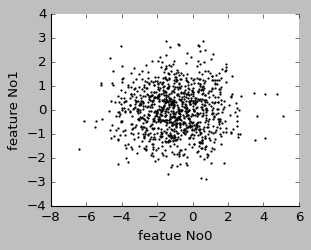

In [201]:
from src.utils.DataFrameExplorer_simple_plots import scatter2D # my function to make nice 2D plots

# plot first two features
plot_data_example(X,y)

In [ ]:
# ******************************************* #
#
#  Part 1. Load and Inspect Dataset
#          ------------------------
#
#  Step 1. import and inspect iris dataset, 
#  Step 2. EDA,
#  Step 3. Create X,y arrays, and EDA 
#          on selected data
#
#
#
# ******************************************* #



#### Step 1. import and inspect iris dataset, 
#### ...........................................

from sklearn import datasets
iris = datasets.load_iris()

# dtype,
print('Type:', type(iris))  
    #   Type: <class 'sklearn.utils.Bunch'> - dct like obj, 
    
# keys, 
iris.keys()
    #   dict_keys(['data', 'target', 'target_names', 
    #              'DESCR', 'feature_names', 'filename'])
    # ! desibed in the above !

    
    
    
    
#### Step 2. EDA,
#### ....................................

# feature names,     
iris.feature_names
    #   ['sepal length (cm)',
    #    'sepal width (cm)',
    #    'petal length (cm)',
    #    'petal width (cm)]
    
pd.value_counts(iris['target_names'])
    #   setosa        1
    #   virginica     1
    #   versicolor    1    
    

# Category distribution
pd.value_counts(iris['target'])
    #   2    50
    #   1    50
    #   0    50
   


    
#### Step 3. Create X,y arrays
#### ....................................


# (1) y - Create the binary target vector
"""
    Goal: to detect setosa flowers, (1), 
          vs all other types of flowers (0)
"""
y = (iris['target'] == 0).astype(int) # array with 0's and 1's




# (2) X - Select data for model, 
"""
    we will work only with petal features (width, lenght), 
    to allow easy visualiozation
"""
X = iris['data'] # Get matrix with all features
X = X[:, [2, 3]] # Keep only petal features



# (3) Plot data points

# ... setosa data points
setosa_idx = (y == 1) 

# ... scatterplots
plt.scatter(
    X[:, 0][setosa_idx], 
    X[:, 1][setosa_idx],
    color='C3', 
    label='setosa'
) # Setosa
plt.scatter(
    X[:, 0][~setosa_idx], 
    X[:, 1][~setosa_idx],
    color='C0', 
    label='other'
) # Versicolor and virginica

# ... Set labels
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
sns.despine()
plt.grid()
plt.show();

"""
    OBSERVATIONS !
    
    THE TWO GROUPS SEEMS TO BE LINEARLY SEPARABLE !

"""

